IMPORT LIBRARIES

In [67]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [36]:
# Ignore Furure Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

LOAD DATA

In [37]:
# Load the dataset from csv file
df = pd.read_csv("../data/raw/house_data.csv")

EXPLORATORY DATA ANALYSIS

In [38]:
# Display the first few rows of the dataset
print(df.head(5))

   Id  LotFrontage  LotArea Street Alley Utilities LotConfig Neighborhood  \
0   1         65.0     8450   Pave   NaN    AllPub    Inside      CollgCr   
1   2         80.0     9600   Pave   NaN    AllPub       FR2      Veenker   
2   3         68.0    11250   Pave   NaN    AllPub    Inside      CollgCr   
3   4         60.0     9550   Pave   NaN    AllPub    Corner      Crawfor   
4   5         84.0    14260   Pave   NaN    AllPub       FR2      NoRidge   

  Condition1 Condition2  ... PoolArea PoolQC  Fence  MiscFeature  MiscVal  \
0       Norm       Norm  ...        0    NaN    NaN          NaN        0   
1      Feedr       Norm  ...        0    NaN    NaN          NaN        0   
2       Norm       Norm  ...        0    NaN    NaN          NaN        0   
3       Norm       Norm  ...        0    NaN    NaN          NaN        0   
4       Norm       Norm  ...        0    NaN    NaN          NaN        0   

  MoSold YrSold SaleType  SaleCondition SalePrice  
0      2   2008       

In [39]:
#Shape
print(df.shape)

(1460, 51)


In [40]:
#Names of Variabels
print(df.columns.tolist())

['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [41]:
# Check for missing values
df.isnull().sum()

Id                  0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
TotalBsmtSF         0
Heating             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageArea          0
GarageCond         81
PavedDrive          0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal   

In [42]:
# List varaibels with missing data
col_misingData = df.columns[df.isnull().any()].tolist()
print(col_misingData)

['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'GarageType', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [43]:
# Summary statistics of numerical features
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,1057.429452,1162.626712,346.992466,...,2.866438,1.046575,6.517808,0.613014,472.980137,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,181.066207,438.705324,386.587738,436.528436,...,0.815778,0.220338,1.625393,0.644666,213.804841,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,795.750000,882.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,991.500000,1087.000000,0.000000,...,3.000000,1.000000,6.000000,1.000000,480.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,166.000000,1298.250000,1391.250000,728.000000,...,3.000000,1.000000,7.000000,1.000000,576.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,...,8.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


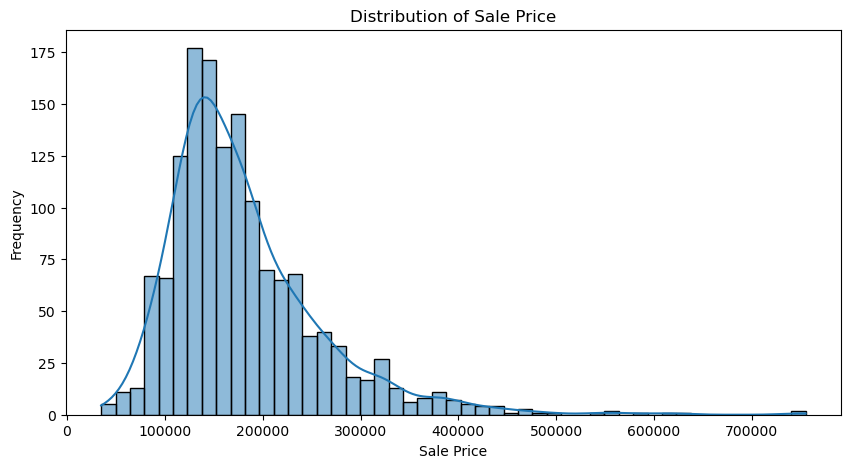

In [44]:
# Visualize the distribution of the target variable (house prices)
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

### Handling Missing Data: MICE Method

Predictor and Target variables separation

In [45]:
# Separate features and target variable
df_features = df.drop(['Id', 'SalePrice'], axis=1)
target = df['SalePrice']
print(df_features.columns.tolist())
print(df_features.shape)

['LotFrontage', 'LotArea', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
(1460, 49)


One-Hot Encoder: Dummy varialbes

Define Numerical and Categorical columns

In [46]:
# Define the columns after removing 'Id' and target variable
num_features = df_features.select_dtypes(include=['number']).columns
cat_features = df_features.select_dtypes(include=['object']).columns

In [47]:
print(df_features[cat_features].shape)
print(df_features[num_features].shape)

(1460, 28)
(1460, 21)


In [70]:
print("Original data shape:", df_features.shape)

# Check for NaN or missing values in df_features
print("Number of NaN or missing values in df_features:", df_features.isnull().sum().sum())


Original data shape: (1460, 49)
Number of NaN or missing values in df_features: 5910


Define Transformers

In [74]:
# Initialize transformer for numerical variables
num_pipe = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=373))
])

# Initialize transformer for categorical variables
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
trans = ColumnTransformer(transformers=[
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features)
])

# Fit and transform the data
df_trans = trans.fit_transform(df_features)
print("Transformed data shape:", df_trans.shape)

Transformed data shape: (1460, 196)


In [76]:
# Detect outliers using Z-score
z_scores = zscore(df_trans, axis=0)

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove rows with outliers
df_no_outliers = df_features.drop(outlier_indices)

print("DataFrame without outliers:")
print(df_no_outliers)

AxisError: axis 0 is out of bounds for array of dimension 0

Combine Transformers to Preprocessor

Handle Missing Values

In [69]:
# Transform the features
df_trans = trans.fit_transform(df_features)
df_trans.shape

ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 1460, expected 1262.

In [65]:
# Get the column names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_categories = cat_encoder.categories

In [66]:
# Construct feature names after one-hot encoding
cat_feature_names = [f"{col}_{cat}" for col, cats in zip(cat_cols, cat_categories) for cat in cats]


In [67]:
# Combine numerical and categorical feature names
feature_names = list(num_cols) + cat_feature_names

In [69]:
# Create a Dataframe with transformed features and feature names
df_X_trans = pd.DataFrame(X_trans, columns=feature_names)
df_X_trans

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,7.0,5.0,2003.0,196.0,856.0,856.0,854.0,0.0,...,2.0,3.0,1.0,8.0,0.0,548.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,6.0,8.0,1976.0,0.0,1262.0,1262.0,0.0,0.0,...,2.0,3.0,1.0,6.0,1.0,460.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,920.0,920.0,866.0,0.0,...,2.0,3.0,1.0,6.0,1.0,608.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,7.0,5.0,1915.0,0.0,756.0,961.0,756.0,0.0,...,1.0,3.0,1.0,7.0,1.0,642.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,1145.0,1145.0,1053.0,0.0,...,2.0,4.0,1.0,9.0,1.0,836.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,5.0,1999.0,0.0,953.0,953.0,694.0,0.0,...,2.0,3.0,1.0,7.0,1.0,460.0,0.0,0.0,8.0,2007.0
1456,85.0,13175.0,6.0,6.0,1978.0,119.0,1542.0,2073.0,0.0,0.0,...,2.0,3.0,1.0,7.0,2.0,500.0,0.0,0.0,2.0,2010.0
1457,66.0,9042.0,7.0,9.0,1941.0,0.0,1152.0,1188.0,1152.0,0.0,...,2.0,4.0,1.0,9.0,2.0,252.0,0.0,2500.0,5.0,2010.0
1458,68.0,9717.0,5.0,6.0,1950.0,0.0,1078.0,1078.0,0.0,0.0,...,1.0,2.0,1.0,5.0,0.0,240.0,0.0,0.0,4.0,2010.0


### CHECKING OUTLIERS

1. Outlier: Boxplot Method

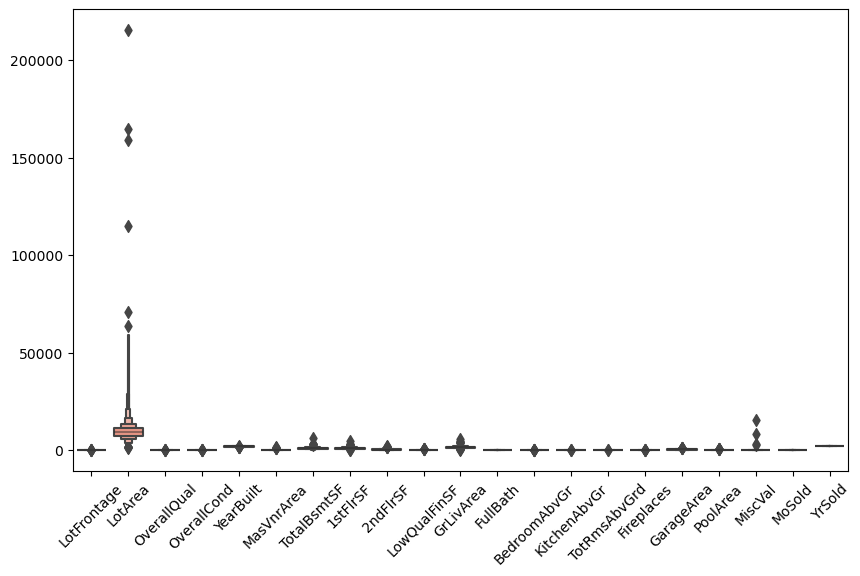

In [71]:
# Visualize numerical variables using box plots to check for outliers
plt.figure(figsize=(10,6))
sns.boxenplot(data=df_X_trans[num_cols])
plt.xticks(rotation=45)
plt.show()

2. Outliers: Histplot Method

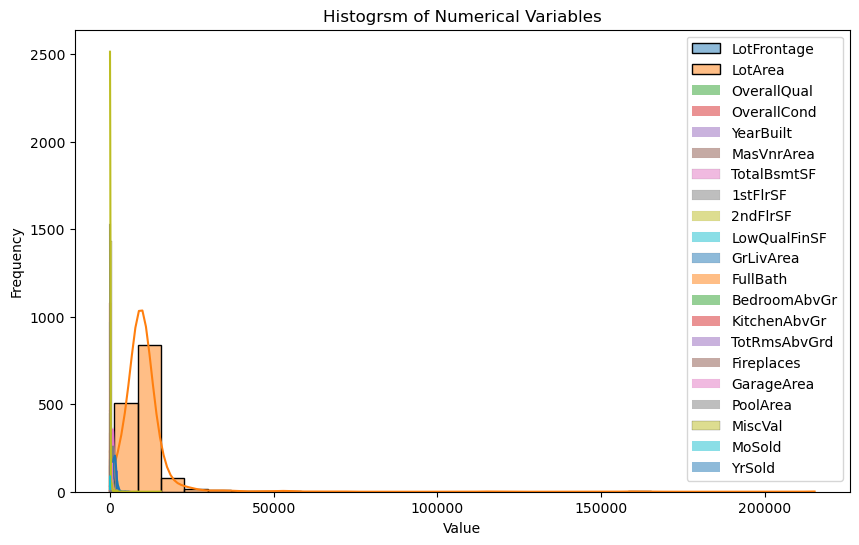

In [72]:
# Visualize numerical variabels using histograms to check for distribution and outliers
plt.figure(figsize=(10,6))
for col in num_cols:
    sns.histplot(df_X_trans[col], kde=True, bins=30, alpha=0.5, label=col)
plt.legend()
plt.title('Histogrsm of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

3. Outliers: IQR Method

In [73]:
# Calculate statistis for numerical variavels to identify outliers
summary_stats = df_X_trans.describe()
Q1 = summary_stats.loc['25%', :]
Q3 = summary_stats.loc['75%', :]
IRQ = Q3 -Q1
print(IRQ)

LotFrontage       22.00
LotArea         4048.00
OverallQual        2.00
OverallCond        1.00
YearBuilt         46.00
MasVnrArea       166.25
TotalBsmtSF      502.50
1stFlrSF         509.25
2ndFlrSF         728.00
LowQualFinSF       0.00
GrLivArea        647.25
FullBath           1.00
BedroomAbvGr       1.00
KitchenAbvGr       0.00
TotRmsAbvGrd       2.00
Fireplaces         1.00
GarageArea       241.50
PoolArea           0.00
MiscVal            0.00
MoSold             3.00
YrSold             2.00
dtype: float64


In [76]:
# MAIN OPTION

# Check for outliers in the transformed DataFrame using IQR method
Q1 = df_X_trans.quantile(0.25)
Q3 = df_X_trans.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_X_trans < (Q1 - 1.5 * IQR)) | (df_X_trans > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with outliers
outlier_rows = df_X_trans[outliers]
print("Rows with outliers:")
print(outlier_rows)

Rows with outliers:
      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
1           80.00   9600.0          6.0          8.0     1976.0         0.0   
5           85.00  14115.0          5.0          5.0     1993.0         0.0   
7           84.02  10382.0          7.0          6.0     1973.0       240.0   
8           51.00   6120.0          7.0          5.0     1931.0         0.0   
9           50.00   7420.0          5.0          6.0     1939.0         0.0   
...           ...      ...          ...          ...        ...         ...   
1446        92.70  26142.0          5.0          7.0     1962.0       189.0   
1447        80.00  10000.0          8.0          5.0     1995.0       438.0   
1449        21.00   1533.0          5.0          7.0     1970.0         0.0   
1450        60.00   9000.0          5.0          5.0     1974.0         0.0   
1457        66.00   9042.0          7.0          9.0     1941.0         0.0   

      TotalBsmtSF  1stFlrSF  2n

In [ ]:
# Identify outliers using IQR method
outliers = ((df_X_trans < (Q1 - 1.5 * IRQ)) | (df_X_trans > (Q3 + 1.5 * IRQ))).any(axis=1)
df_outliers = df_X_trans[outliers]
print(f"Outliers identified using IQR method: \n{df_outliers}")

4. Outliers: Z-Score Method

In [ ]:
# Identify Outliers using Z-Score Method
q1, q3 = np.percentile(df_X_trans, [25,27])
print(q1, q3)

# Find hte IQR
iqr = q3 - q1
print(iqr)

In [ ]:
# Find the lower bound value and hte upper bound value
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)
print(lower, upper)

#### Analyze Outliers

In [78]:
# Calcuate mean, and standard deviation
outlier_stats = outlier_rows[num_cols].describe()
outlier_stats

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,74.718096,12865.152305,6.072144,5.765531,1963.769539,166.998697,1064.807615,1240.865731,434.192385,17.100200,...,1.627255,3.014028,1.136273,7.032064,0.681363,485.172345,8.072144,127.242485,6.366733,2007.905812
std,32.579192,16354.023801,1.604088,1.539028,31.698837,261.086550,603.914392,493.674921,482.105659,82.058469,...,0.602320,1.036388,0.360537,1.982598,0.723024,255.359512,68.455998,842.874196,2.646468,1.340273
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,60.000000,7229.500000,5.000000,5.000000,1946.500000,0.000000,717.000000,883.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,6.000000,0.000000,310.000000,0.000000,0.000000,5.000000,2007.000000
50%,74.000000,10206.000000,6.000000,5.000000,1967.000000,0.000000,970.000000,1137.000000,316.000000,0.000000,...,2.000000,3.000000,1.000000,7.000000,1.000000,484.000000,0.000000,0.000000,6.000000,2008.000000
75%,90.000000,13500.500000,7.000000,7.000000,1992.000000,294.500000,1420.000000,1539.000000,800.000000,0.000000,...,2.000000,4.000000,1.000000,8.000000,1.000000,613.500000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,8.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,15500.000000,12.000000,2010.000000


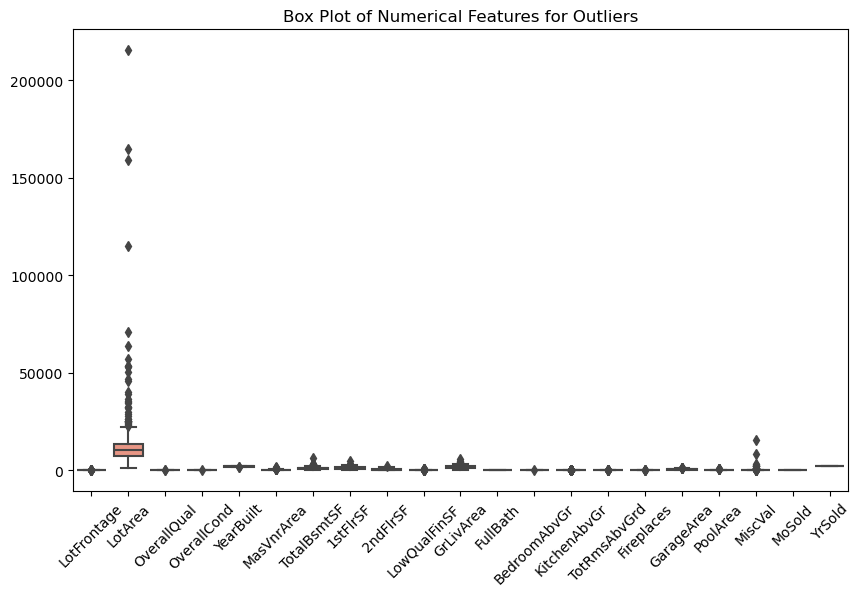

In [79]:
# Plot outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=outlier_rows[num_cols])
plt.title('Box Plot of Numerical Features for Outliers')
plt.xticks(rotation=45)
plt.show()

In [81]:
# Additionally, you may want to remove or correct outliers depending on your analysis goals
# For example, you can replace outliers with the median value of the respective columns
X_transformed_df_corrected = df_X_trans.copy()
for col in num_cols:
    median_val = df_X_trans[col].median()
    X_transformed_df_corrected.loc[X_transformed_df_corrected[col] < (Q1[col] - 1.5 * IQR[col]), col] = median_val
    X_transformed_df_corrected.loc[X_transformed_df_corrected[col] > (Q3[col] + 1.5 * IQR[col]), col] = median_val

# Now you can use X_transformed_df_corrected for further analysis or modeling

# Print statistics after correcting outliers
print("Statistics after correcting outliers:")
print(X_transformed_df_corrected[num_cols].describe())

Statistics after correcting outliers:
       LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.224445   9282.270890     6.106164     5.414384  1971.721233   
std      16.341794   3120.532187     1.370037     0.775878    29.506258   
min      30.000000   1491.000000     2.000000     4.000000  1885.000000   
25%      60.000000   7560.000000     5.000000     5.000000  1954.000000   
50%      70.000000   9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000  11107.250000     7.000000     6.000000  2000.000000   
max     115.000000  17671.000000    10.000000     7.000000  2010.000000   

        MasVnrArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000        1460.0  ...   
mean     63.041014  1056.884589  1142.386301   344.295890           0.0  ...   
std     104.928027   340.833638   343.020748  

# CORRELATION

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Correlation heatmap to check the relationship between numerical features and target variable
cmax = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cmax,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1. Numerical Varialbes Correlation

# Calculate the correlation matrix
corr_max = df.corr()

# Use the heatmap function from seaborn to plot the correlation matrix
plt.figure(figsize=(10,6))
# Plot the heatmap
sns.heatmap(corr_max, annot=True, fmt='.2f', cmap='coolwarm')
# Focus on the 'SalePrice' correlations
SalePrcie_corr = corr_max['SalePrice'].sort_values(ascending=False)
print(SalePrcie_corr)

In [ ]:
# Visualize correlation relationship using scatter plot
# Replace x values to compare each predictor variables
sns.scatterplot(data=df, x='MiscVal', y='SalePrice')
plt.show()

In [ ]:
# Pairplot for scatter plots between numerical features and target variable
sns.pairplot(df,x_vars=['OverallCond','Fireplaces','FullBath'],y_vars=['SalePrice'])
plt.show()